In [2]:
import pandas as pd
import numpy as np

import seaborn as sn
import matplotlib.pyplot as plt

import chardet

In [3]:
df = pd.read_csv(r'D:\customer-churn\customer-churn\data\insurance data.csv')

In [17]:
df.shape

(10008, 13)

In [12]:
print(df.head().to_markdown())

|    |   age | sex    |    bmi |   children | smoker   |   Claim_Amount |   past_consultations |   num_of_steps |   Hospital_expenditure |   NUmber_of_past_hospitalizations |   Anual_Salary | region    |   charges |
|---:|------:|:-------|-------:|-----------:|:---------|---------------:|---------------------:|---------------:|-----------------------:|----------------------------------:|---------------:|:----------|----------:|
|  0 |    45 | male   | 28.7   |          2 | no       |        32993.8 |                   16 |         902022 |            8.64089e+06 |                                 1 |    9.43659e+07 | southwest |   8027.97 |
|  1 |    64 | male   | 34.5   |          0 | no       |        38448.4 |                    8 |         956604 |            1.10224e+07 |                                 1 |    2.30022e+08 | southwest |  13822.8  |
|  2 |    19 | female | 32.11  |          0 | no       |        50778.1 |                   15 |         758688 |            1.64263e+06

In [14]:
print(df.dtypes.to_markdown())

|                                 | 0       |
|:--------------------------------|:--------|
| age                             | float64 |
| sex                             | object  |
| bmi                             | float64 |
| children                        | float64 |
| smoker                          | object  |
| Claim_Amount                    | float64 |
| past_consultations              | float64 |
| num_of_steps                    | float64 |
| Hospital_expenditure            | float64 |
| NUmber_of_past_hospitalizations | float64 |
| Anual_Salary                    | float64 |
| region                          | object  |
| charges                         | float64 |


In [6]:
print(df.describe().to_markdown())

|       |       age |        bmi |   children |   Claim_Amount |   past_consultations |     num_of_steps |   Hospital_expenditure |   NUmber_of_past_hospitalizations |   Anual_Salary |   charges |
|:------|----------:|-----------:|-----------:|---------------:|---------------------:|-----------------:|-----------------------:|----------------------------------:|---------------:|----------:|
| count | 9935      | 9984       | 9963       |        9909    |           9957       |   9984           |         9978           |                       9998        | 9971           |  10008    |
| mean  |   39.0024 |   30.4352  |    1.06263 |       32220.9  |             14.4161  | 896863           |            1.11989e+07 |                          0.972494 |    2.63017e+08 |  11024.9  |
| std   |   13.9488 |    6.11251 |    1.19058 |       15079.4  |              6.89584 |  84721.8         |            1.90751e+07 |                          0.4667   |    4.19173e+08 |   9704.37 |
| min   |   18 

In [7]:
print(df.isnull().sum().to_markdown())

|                                 |   0 |
|:--------------------------------|----:|
| age                             |  73 |
| sex                             |   0 |
| bmi                             |  24 |
| children                        |  45 |
| smoker                          |   0 |
| Claim_Amount                    |  99 |
| past_consultations              |  51 |
| num_of_steps                    |  24 |
| Hospital_expenditure            |  30 |
| NUmber_of_past_hospitalizations |  10 |
| Anual_Salary                    |  37 |
| region                          |   0 |
| charges                         |   0 |


In [8]:
X_labels = df.isnull().sum().index
Y_labels = df.isnull().sum().values

[]

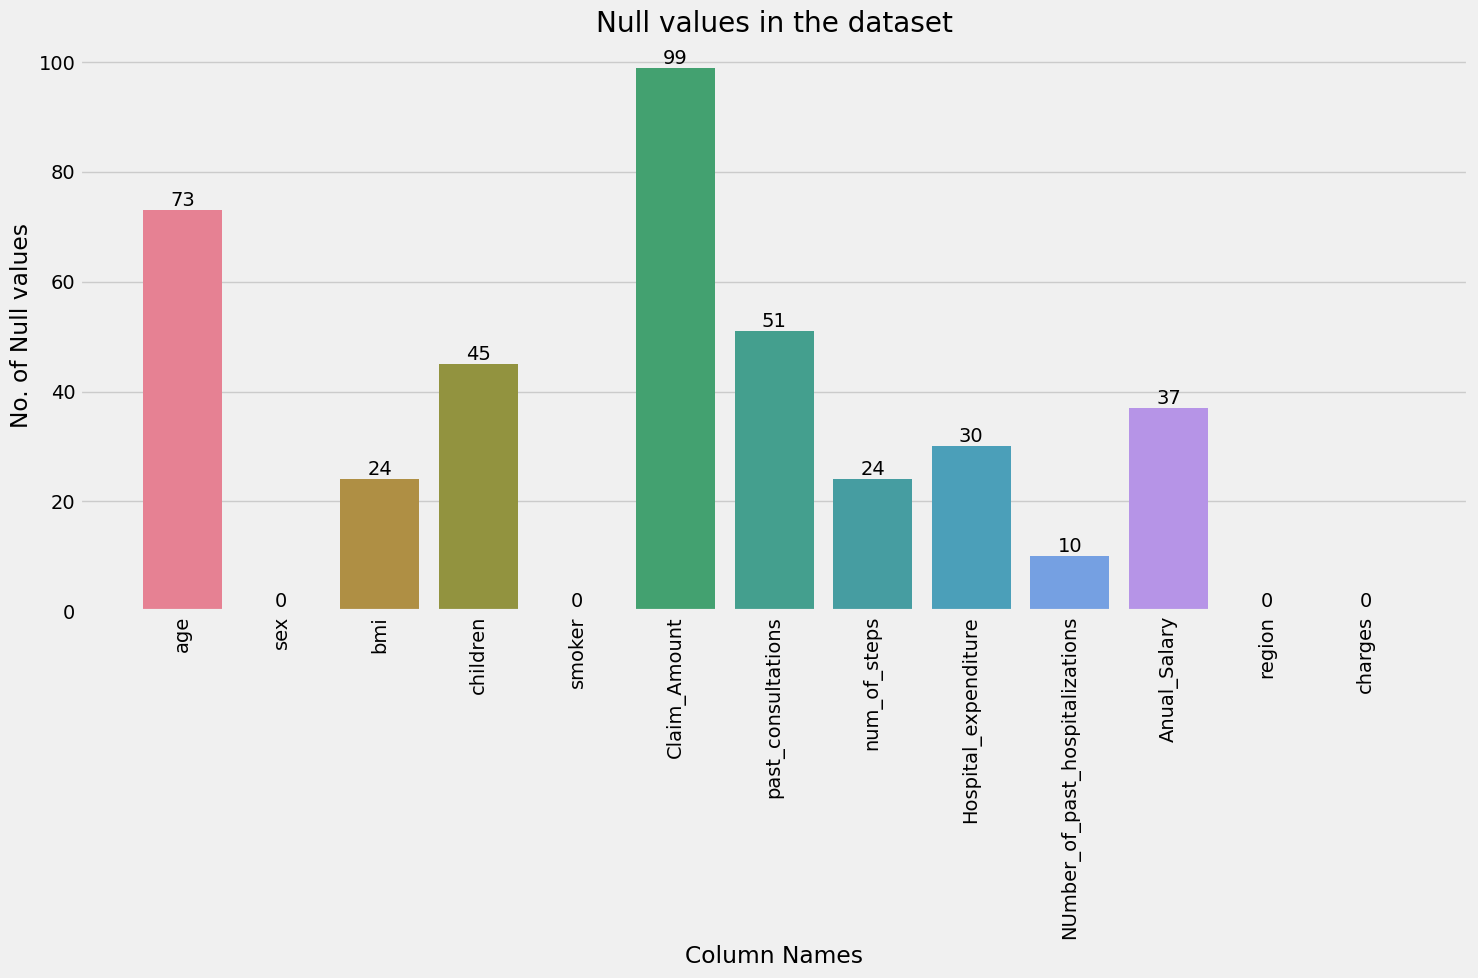

In [9]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(15, 10))

sn.barplot(x = X_labels, y = Y_labels, hue=X_labels)

plt.xlabel('Column Names')
plt.ylabel('No. of Null values')
plt.title('Null values in the dataset')

plt.xticks(rotation = 90)

for i in range(len(X_labels)):
    plt.text(i, Y_labels[i], Y_labels[i], ha = 'center', va = 'bottom')

plt.tight_layout()

plt.plot()

In [11]:
info = {
    'columns' : df.columns,
    'Info': ['Represents the age of the insured individual, a significant factor influencing health insurance charges.',
             'Indicates the gender of the insured individual, distinguishing between male and female categories.',
             "A numerical measure derived from an individual's weight and height, serving as an indicator of body fatness.",
             'Indicates the number of children covered under the insurance plan, reflecting family size and potential healthcare needs.',
             'Categorizes individuals based on their smoking habits, distinguishing between smokers and non-smokers.',
             "Represents the monetary value requested for an insurance claim.",
             'The "past_consultations" variable represents the number of previous insurance consultations.',
             'Represents the number of steps taken by an individual.',
             'Hospital expenditure: healthcare costs incurred by insurance for hospital services.',
             'Frequency of previous hospital admissions in insurance dataset.',
             'Yearly income of insured individuals in insurance dataset.',
             "Specifies the geographical region where the insured individual resides, capturing regional variations in healthcare costs and accessibility.",
             "The target variable, quantifying the charges associated with health insurance coverage, influenced by the individual's characteristics."
             ]
}

print(pd.DataFrame(info, columns=['columns', 'Info']).to_markdown())

|    | columns                         | Info                                                                                                                                         |
|---:|:--------------------------------|:---------------------------------------------------------------------------------------------------------------------------------------------|
|  0 | age                             | Represents the age of the insured individual, a significant factor influencing health insurance charges.                                     |
|  1 | sex                             | Indicates the gender of the insured individual, distinguishing between male and female categories.                                           |
|  2 | bmi                             | A numerical measure derived from an individual's weight and height, serving as an indicator of body fatness.                                 |
|  3 | children                        | Indicates the number of children covere